In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge
from sklearn import metrics

In [2]:
# importing data

df =pd.read_csv('JFK.csv')
pd.set_option('display.max_columns', None)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
## Revising column names
column_names={"OP_UNIQUE_CARRIER":"CARRIER_CODE",
                "CRS_ELAPSED_TIME":"SCHEDULED_DURATION",
                "CRS_DEP_M":"SCHEDULED_DEPARTURE",
                "DEP_TIME_M":"ACTUAL_DEP_TIME",
                "CRS_ARR_M":"SCHEDULED_ARRIVAL",
                "sch_dep":"FLT_SCH_ARRIVAL",
                "sch_arr":"FLT_SCH_DEPARTURE"}

df = df.rename(column_names,axis=1)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER_CODE,TAIL_NUM,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                28820 non-null  int64  
 1   DAY_OF_MONTH         28820 non-null  int64  
 2   DAY_OF_WEEK          28820 non-null  int64  
 3   CARRIER_CODE         28820 non-null  object 
 4   TAIL_NUM             28820 non-null  object 
 5   DEST                 28820 non-null  object 
 6   DEP_DELAY            28820 non-null  int64  
 7   SCHEDULED_DURATION   28820 non-null  int64  
 8   DISTANCE             28820 non-null  int64  
 9   SCHEDULED_DEPARTURE  28820 non-null  int64  
 10  ACTUAL_DEP_TIME      28820 non-null  int64  
 11  SCHEDULED_ARRIVAL    28820 non-null  int64  
 12  Temperature          28820 non-null  int64  
 13  Dew Point            28820 non-null  object 
 14  Humidity             28820 non-null  int64  
 15  Wind                 28818 non-null 

In [6]:
## creating new column to understand total flights

df["TOTAL_SCHEDULED"] = df["FLT_SCH_ARRIVAL"] + df["FLT_SCH_DEPARTURE"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                28820 non-null  int64  
 1   DAY_OF_MONTH         28820 non-null  int64  
 2   DAY_OF_WEEK          28820 non-null  int64  
 3   CARRIER_CODE         28820 non-null  object 
 4   TAIL_NUM             28820 non-null  object 
 5   DEST                 28820 non-null  object 
 6   DEP_DELAY            28820 non-null  int64  
 7   SCHEDULED_DURATION   28820 non-null  int64  
 8   DISTANCE             28820 non-null  int64  
 9   SCHEDULED_DEPARTURE  28820 non-null  int64  
 10  ACTUAL_DEP_TIME      28820 non-null  int64  
 11  SCHEDULED_ARRIVAL    28820 non-null  int64  
 12  Temperature          28820 non-null  int64  
 13  Dew Point            28820 non-null  object 
 14  Humidity             28820 non-null  int64  
 15  Wind                 28818 non-null 

In [7]:
df["TOTAL_SCHEDULED"].value_counts(ascending = True)

TOTAL_SCHEDULED
2        2
9        2
18       3
8        4
17       4
      ... 
70    1156
67    1296
66    1328
64    1391
68    1494
Name: count, Length: 73, dtype: int64

In [8]:
## to understand airports traffic status

df["AIRPORT_STATUS"] = pd.cut(df["TOTAL_SCHEDULED"], bins=[0,20,40,100],
                             include_lowest=True, labels = ["0","1","2"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MONTH                28820 non-null  int64   
 1   DAY_OF_MONTH         28820 non-null  int64   
 2   DAY_OF_WEEK          28820 non-null  int64   
 3   CARRIER_CODE         28820 non-null  object  
 4   TAIL_NUM             28820 non-null  object  
 5   DEST                 28820 non-null  object  
 6   DEP_DELAY            28820 non-null  int64   
 7   SCHEDULED_DURATION   28820 non-null  int64   
 8   DISTANCE             28820 non-null  int64   
 9   SCHEDULED_DEPARTURE  28820 non-null  int64   
 10  ACTUAL_DEP_TIME      28820 non-null  int64   
 11  SCHEDULED_ARRIVAL    28820 non-null  int64   
 12  Temperature          28820 non-null  int64   
 13  Dew Point            28820 non-null  object  
 14  Humidity             28820 non-null  int64   
 15  Wind               

In [9]:
df['Dew Point'] = df['Dew Point'].astype(str).astype(int)
df.isnull().sum()

MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
CARRIER_CODE           0
TAIL_NUM               0
DEST                   0
DEP_DELAY              0
SCHEDULED_DURATION     0
DISTANCE               0
SCHEDULED_DEPARTURE    0
ACTUAL_DEP_TIME        0
SCHEDULED_ARRIVAL      0
Temperature            0
Dew Point              0
Humidity               0
Wind                   2
Wind Speed             0
Wind Gust              0
Pressure               0
Condition              0
FLT_SCH_ARRIVAL        0
FLT_SCH_DEPARTURE      0
TAXI_OUT               0
TOTAL_SCHEDULED        0
AIRPORT_STATUS         0
dtype: int64

In [10]:
# Dominant wind direction is West for this airport. Fill 2 null values with must common wind.

df['Wind'] = df['Wind'].fillna(value='W')
df.isnull().sum()

MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
CARRIER_CODE           0
TAIL_NUM               0
DEST                   0
DEP_DELAY              0
SCHEDULED_DURATION     0
DISTANCE               0
SCHEDULED_DEPARTURE    0
ACTUAL_DEP_TIME        0
SCHEDULED_ARRIVAL      0
Temperature            0
Dew Point              0
Humidity               0
Wind                   0
Wind Speed             0
Wind Gust              0
Pressure               0
Condition              0
FLT_SCH_ARRIVAL        0
FLT_SCH_DEPARTURE      0
TAXI_OUT               0
TOTAL_SCHEDULED        0
AIRPORT_STATUS         0
dtype: int64

In [11]:
cor_taxi  = df.select_dtypes(exclude='object').corr()['TAXI_OUT'].sort_values(ascending=False)
cor_taxi

TAXI_OUT               1.000000
FLT_SCH_ARRIVAL        0.190101
TOTAL_SCHEDULED        0.182427
AIRPORT_STATUS         0.112282
Wind Gust              0.095643
SCHEDULED_ARRIVAL      0.071377
SCHEDULED_DURATION     0.070838
FLT_SCH_DEPARTURE      0.064284
Wind Speed             0.062522
DISTANCE               0.059856
ACTUAL_DEP_TIME        0.057896
SCHEDULED_DEPARTURE    0.044864
DEP_DELAY              0.034881
DAY_OF_WEEK            0.028388
MONTH                  0.018505
Dew Point              0.010216
DAY_OF_MONTH          -0.023990
Humidity              -0.026826
Pressure              -0.059290
Temperature           -0.067574
Name: TAXI_OUT, dtype: float64

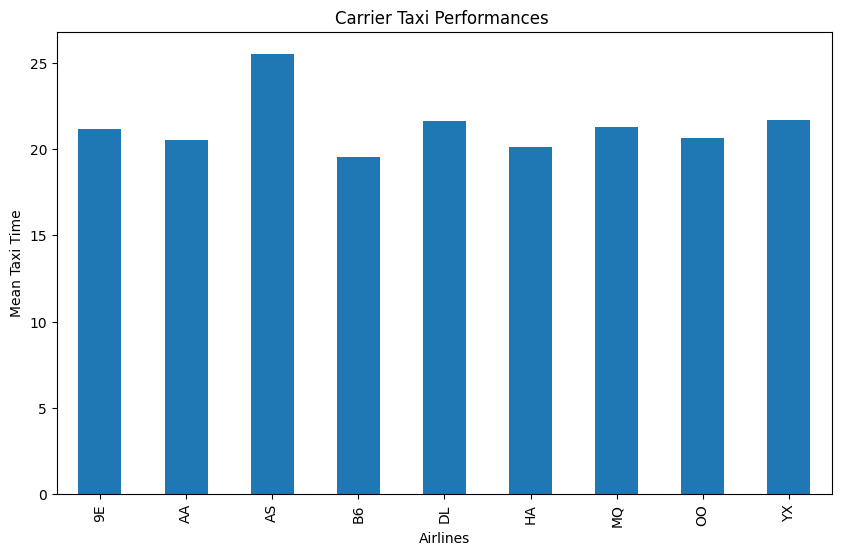

In [12]:
## Plotting according to Carriers

df.groupby('CARRIER_CODE')['TAXI_OUT'].mean().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Airlines')
plt.ylabel('Mean Taxi Time')
plt.title('Carrier Taxi Performances ')
plt.show()

In [13]:
## Carriers have similar delay rates.

df.drop(['CARRIER_CODE'],axis=1,inplace=True)

In [14]:
## Since distance and duration represent similar things and are highly correlated, we can drop duration

df.drop(["SCHEDULED_DURATION"], axis=1, inplace=True)

In [15]:
df[df['TAIL_NUM']=='N992JB']['DEST'].value_counts()

DEST
LAX    25
SFO    10
LAS     8
SAN     4
SEA     2
PSP     1
Name: count, dtype: int64

In [16]:
# Tail number is a register number for an aircraft. Aircraft flights different destinations not stick to specific route
df.drop(["TAIL_NUM"], axis=1, inplace=True)

In [17]:
subset = ['Temperature','Dew Point','Pressure']
subdf = df.loc[:,subset]

<Axes: >

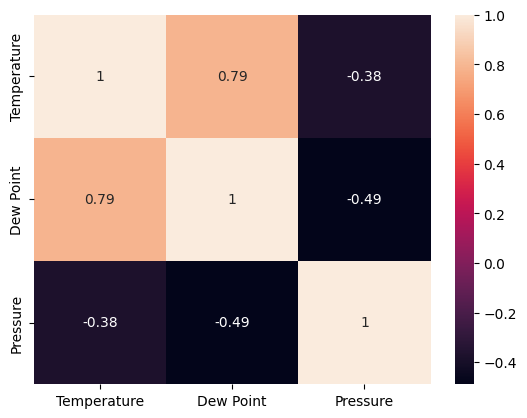

In [18]:
## investigate correlation of metar

sns.heatmap(subdf.corr(),annot=True)

In [19]:
# Pressure has negative relation with dew point. These methorical informantions cause noises in the data. We should remove one to avoid multicolinearity.abs

df.drop(["Dew Point"], axis=1, inplace=True) 

In [20]:
## We have created a new column to detect total traffics so we do not need these anymore.
df.drop(["FLT_SCH_ARRIVAL"], axis=1, inplace=True)
df.drop(["FLT_SCH_DEPARTURE"], axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

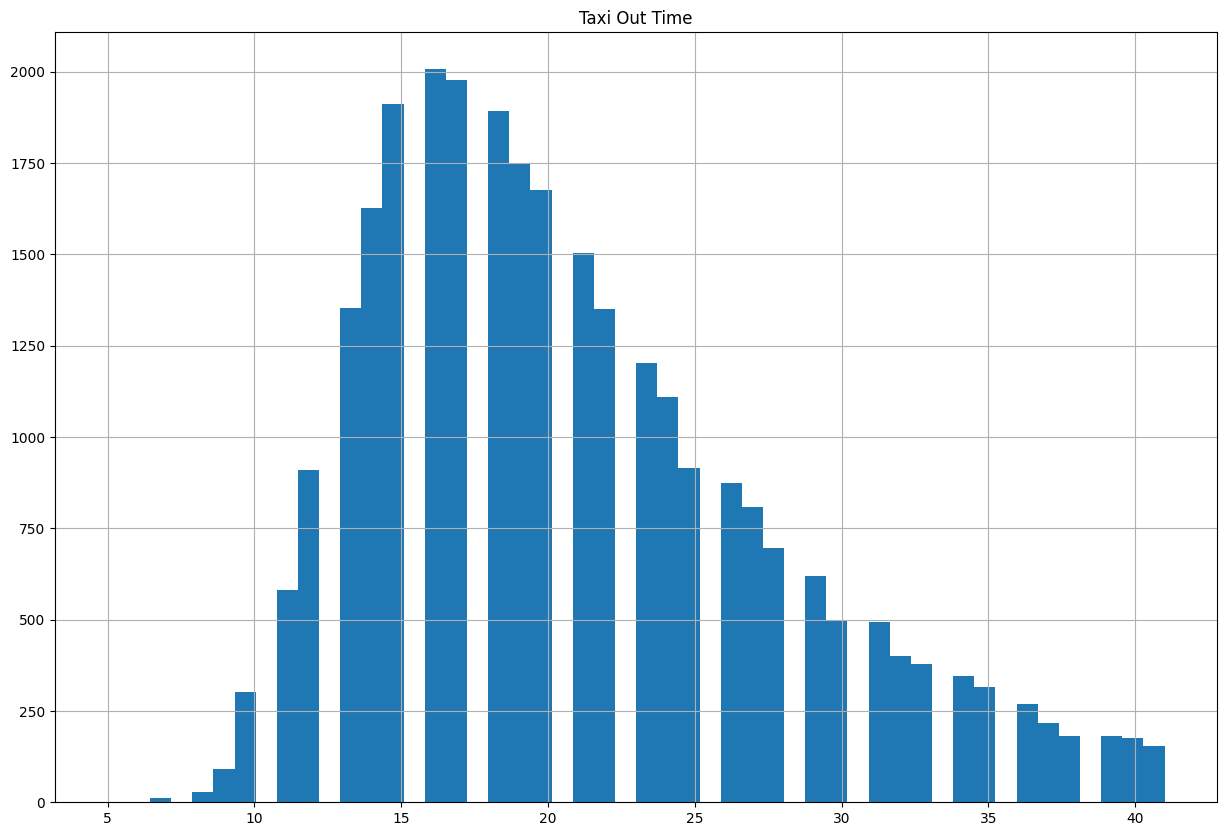

In [21]:
## Plotting taxi out time

df['TAXI_OUT'].hist(bins=50,figsize=(15,10))
plt.title('Taxi Out Time')
plt.show

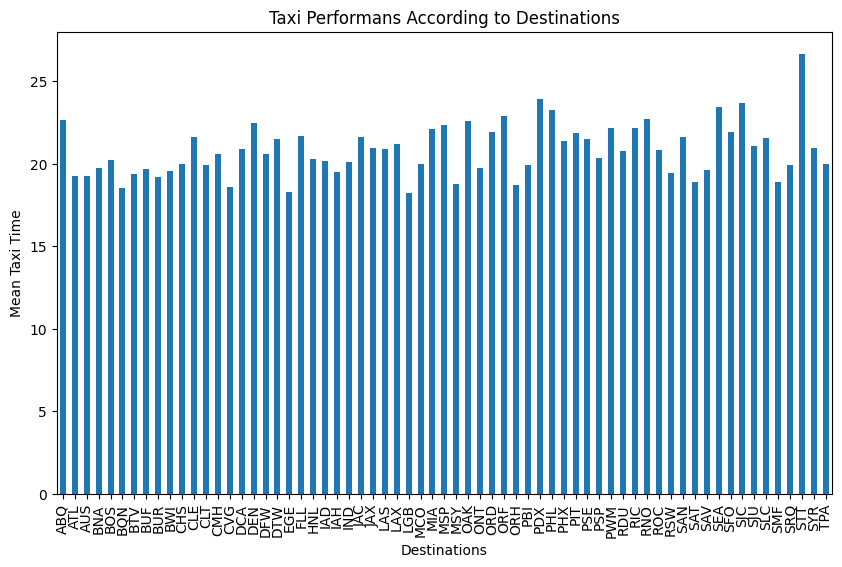

In [22]:
df.groupby('DEST')['TAXI_OUT'].mean().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Destinations')
plt.ylabel('Mean Taxi Time')
plt.title('Taxi Performans According to Destinations')
plt.show()

In [23]:
destdf = df.groupby('DEST')['DEP_DELAY'].mean().sort_values(ascending=False)
destdf.head(10)


DEST
PSE    23.358974
JAC    22.200000
ORH    16.211111
BWI    15.665796
SAT    15.331250
IAH    11.945312
SMF    11.292683
ORD    11.068852
MSP    10.679878
BOS    10.536605
Name: DEP_DELAY, dtype: float64

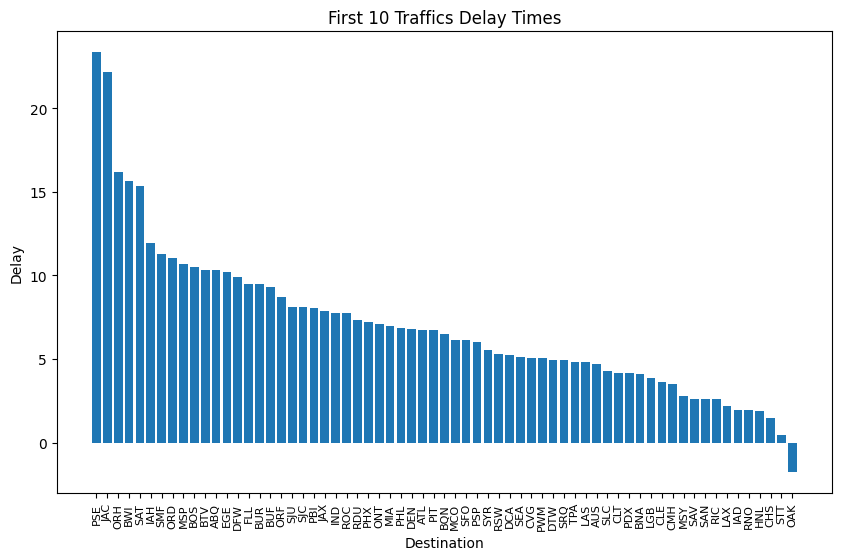

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(destdf.index, destdf.values)
plt.xlabel('Destination')
plt.ylabel('Delay')
plt.title('First 10 Traffics Delay Times')
plt.xticks(rotation=90,fontsize =8)
plt.show()

Since the 'Wind' column is in the object data type, we need to convert this column into numerical values to ensure the model's understanding

In [25]:
## Mapping 

df['Wind'] = df['Wind'].astype(str)

degrees = {'NNW': 340, 'CALM': 0, 'NNE':20, 'NE':45, 'VAR':0, 'WSW':230, 'S':180,
           'SSW':200, 'WNW':290, 'ESE':115, 'N': 360, 'SW':225, 'E':90, 'W':270,
           'SSE':155, 'ENE':70, 'NW':315, 'SE':135}

df['Wind'] = df['Wind'].apply(lambda x: degrees.get(x,x))
df['Wind']

0        270
1        270
2        270
3        270
4        270
        ... 
28815    360
28816    360
28817    360
28818    360
28819    360
Name: Wind, Length: 28820, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MONTH                28820 non-null  int64   
 1   DAY_OF_MONTH         28820 non-null  int64   
 2   DAY_OF_WEEK          28820 non-null  int64   
 3   DEST                 28820 non-null  object  
 4   DEP_DELAY            28820 non-null  int64   
 5   DISTANCE             28820 non-null  int64   
 6   SCHEDULED_DEPARTURE  28820 non-null  int64   
 7   ACTUAL_DEP_TIME      28820 non-null  int64   
 8   SCHEDULED_ARRIVAL    28820 non-null  int64   
 9   Temperature          28820 non-null  int64   
 10  Humidity             28820 non-null  int64   
 11  Wind                 28820 non-null  int64   
 12  Wind Speed           28820 non-null  int64   
 13  Wind Gust            28820 non-null  int64   
 14  Pressure             28820 non-null  float64 
 15  Condition          

In [27]:
df.drop('DEST',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MONTH                28820 non-null  int64   
 1   DAY_OF_MONTH         28820 non-null  int64   
 2   DAY_OF_WEEK          28820 non-null  int64   
 3   DEP_DELAY            28820 non-null  int64   
 4   DISTANCE             28820 non-null  int64   
 5   SCHEDULED_DEPARTURE  28820 non-null  int64   
 6   ACTUAL_DEP_TIME      28820 non-null  int64   
 7   SCHEDULED_ARRIVAL    28820 non-null  int64   
 8   Temperature          28820 non-null  int64   
 9   Humidity             28820 non-null  int64   
 10  Wind                 28820 non-null  int64   
 11  Wind Speed           28820 non-null  int64   
 12  Wind Gust            28820 non-null  int64   
 13  Pressure             28820 non-null  float64 
 14  Condition            28820 non-null  object  
 15  TAXI_OUT           

In [28]:
#One-Hot-Encoding Splitting data into two groups to apply encode on objects
df_numeric = df.select_dtypes(exclude='object')
df_object = df.select_dtypes(include='object')


In [29]:
df_object_dummies = pd.get_dummies(df_object,columns=['Condition'])
df_object_dummies


,Condition_Cloudy,Condition_Cloudy / Windy,Condition_Drizzle and Fog,Condition_Fair,Condition_Fair / Windy,Condition_Fog,Condition_Fog / Windy,Condition_Heavy Rain,Condition_Heavy Rain / Windy,Condition_Light Drizzle,Condition_Light Drizzle / Windy,Condition_Light Freezing Rain,Condition_Light Rain,Condition_Light Rain / Windy,Condition_Light Snow,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28816,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28817,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28818,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
df_numeric

finaldf= pd.concat([df_numeric,df_object_dummies],axis=1)
finaldf

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL,Temperature,Humidity,Wind,Wind Speed,Wind Gust,Pressure,TAXI_OUT,TOTAL_SCHEDULED,AIRPORT_STATUS,Condition_Cloudy,Condition_Cloudy / Windy,Condition_Drizzle and Fog,Condition_Fair,Condition_Fair / Windy,Condition_Fog,Condition_Fog / Windy,Condition_Heavy Rain,Condition_Heavy Rain / Windy,Condition_Light Drizzle,Condition_Light Drizzle / Windy,Condition_Light Freezing Rain,Condition_Light Rain,Condition_Light Rain / Windy,Condition_Light Snow,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,-1,636,324,323,448,48,58,270,25,38,29.86,14,26,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,11,1,5,-7,2475,340,333,531,48,58,270,25,38,29.86,15,26,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,11,1,5,40,1069,301,341,482,48,58,270,25,38,29.86,22,26,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,11,1,5,-2,944,345,343,513,48,58,270,25,38,29.86,12,26,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,11,1,5,-4,760,360,356,499,46,58,270,24,35,29.91,13,26,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,150,1370,1372,1427,39,96,360,6,0,30.18,19,52,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28816,1,31,5,2,187,1390,1392,25,39,96,360,6,0,30.18,22,42,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28817,1,31,5,283,2422,1125,1408,1337,39,96,360,6,0,30.18,21,42,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28818,1,31,5,5,1598,1417,1422,261,39,96,360,6,0,30.18,13,42,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df=finaldf


SCALING

In [32]:
## Creaating X,y

X = df.drop('TAXI_OUT',axis=1)
y = df['TAXI_OUT']

In [33]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale Data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Optional : It's a better way to keep a pickle of dataset. 

# save the data 
import pickle

data = {
    "x_train": X_train,
    "y_train": y_train,
    "x_test": X_test,
    "y_test": y_test
}

with open('data.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)


In [34]:
## LINEAR REGRESSION
model = Ridge(alpha=100)

In [35]:
model.fit(X_train, y_train)

Ridge(alpha=100)

In [36]:
y_pred = model.predict(X_test)

In [37]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 5.230542313332764
MSE: 42.90709752449763
RMSE: 6.550350946666723
R2: 0.08969870657861023


In [38]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predited':y_pred})

,Actual,Predited
21527,32,21.948909
21965,15,20.402309
10037,20,22.933926
7827,13,22.461962
18190,25,18.879318
...,...,...
6906,23,21.573537
11414,24,18.791319
16481,20,20.351844
8184,37,21.121008


In [39]:
## LASSO
from sklearn.linear_model import Lasso


In [40]:
lasso_model = Lasso(alpha=1.0)

lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)

In [41]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 5.4796852739035495
MSE: 46.57665753373332
RMSE: 6.824709336941268
R2: 0.011846663084233655


In [42]:
import xgboost as xgb

In [43]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

In [44]:
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

/Users/harun/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [45]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.484817971296397
MSE: 32.93341907571807
RMSE: 5.738764594903512
R2: 0.3012966219796561


In [46]:
## Random Forest Model

from sklearn.ensemble import RandomForestRegressor

In [47]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
rf_reg_pred = rf_reg.predict(X_test)

In [49]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.484817971296397
MSE: 32.93341907571807
RMSE: 5.738764594903512
R2: 0.3012966219796561


In [50]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predited':rf_reg_pred})

,Actual,Predited
21527,32,25.60
21965,15,19.51
10037,20,24.30
7827,13,22.64
18190,25,19.75
...,...,...
6906,23,18.96
11414,24,19.26
16481,20,20.15
8184,37,22.28


In [51]:
## Additional checking for beest parameters via GridSearch

base_elastic_model = ElasticNet()

In [52]:
param_grid = {'alpha':[0.1,1,5,10,50,100],'l1_ratio':[.1,.5,.7,.95,.99,1]}

In [53]:
grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=2)

In [54]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.3s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [55]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [56]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [57]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.231627,0.062341,0.035811,0.010820,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-41.969857,-44.058979,-41.925300,-42.820407,-44.263177,-43.007544,0.996514,1
1,0.258278,0.015100,0.027227,0.013175,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-42.111888,-44.089573,-41.910770,-42.953702,-44.395316,-43.092250,1.006860,2
2,0.284523,0.007083,0.023828,0.012222,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-42.237107,-44.127185,-41.945072,-43.039701,-44.500607,-43.169934,1.007416,3
3,0.257439,0.020128,0.043159,0.015996,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-42.377822,-44.199146,-42.011336,-43.148566,-44.588685,-43.265111,0.999708,4
4,0.258478,0.017426,0.032030,0.016283,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-42.396679,-44.209258,-42.022919,-43.165284,-44.600585,-43.278945,0.998111,5
5,0.267355,0.024500,0.031173,0.009671,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-42.401520,-44.211880,-42.025952,-43.169561,-44.603827,-43.282548,0.997742,6
6,0.253734,0.027229,0.028685,0.015449,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-43.528859,-45.237107,-43.197561,-44.228855,-45.404902,-44.319457,0.884554,7
7,0.254079,0.009154,0.022226,0.006154,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-45.094170,-46.746674,-44.676817,-45.868791,-46.814723,-45.840235,0.858164,8
8,0.124715,0.018544,0.032796,0.010730,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-45.331623,-46.967071,-44.985847,-46.092563,-47.013984,-46.078218,0.826632,9
9,0.117893,0.007455,0.025013,0.006811,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-45.572185,-47.178096,-45.350803,-46.351880,-47.210788,-46.332750,0.778281,10


In [58]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.484817971296397
MSE: 32.93341907571807
RMSE: 5.738764594903512
R2: 0.3012966219796561
